In [1]:
%matplotlib inline
from scipy.optimize import minimize
import numpy as np
import matplotlib.pyplot as plt
from scipy.constants import pi, Boltzmann

$$ \Gamma_0 = \dfrac{6 \pi \eta_{air} r}{m} \dfrac{0.619}{0.619 + K_n} (1+ c_k)$$ 
*(Li et al. 2011 - https://arxiv.org/pdf/1101.1283.pdf)*

Where:

- $\eta_{air}$ is the viscosity of air
- $r$ is the radius of the silica nanoparticles
- $m$ is the mass of the silica nanoparticles
- $K_n$ is the Knudsen number $\dfrac{s}{r}$ where $s$ is the mean free path of the air particles
- $c_k$ is a small positive function of $K_n$ which takes the form $(0.31K_n)/(0.785+1.152K_n+K_n^2)$

The mean free path is dependant upon the pressure of the system. The mathematical
form the mean free path, is dependant upon whether the particles under study are con- sidered to be hard like spheres colliding or as “soft” spheres following Lennard-Jones Potential. In this case assuming the gas particles to be hard spheres yields the following form, 

$$s = \dfrac{k_B T_0}{ \sqrt{2} \pi d_{gas}^2 P_{gas}} $$

*(Muddassar - Thesis - Cooling and Squeezing in Levitated Optomechanics 2016)*

Where $d_{gas}$ is the diameter of the gas particles, $T_0$ is the temperature and $P_{gas}$ is the pressure of the gas in pascals.

Where:

- $d_{gas}$ is the diameter |of the gas particles
- $T_0$ is the temperature of the gas
- $P_{gas}$ is the pressure of the gas

In [179]:
# constants
k_B = Boltzmann
eta_air = 18.27e-6 # Pa # (J.T.R.Watson (1995)).
d_gas = 0.372e-9 #m #(Sone (2007)), ρSiO2
rho_SiO2 = 1800 # #kg/m^3 - Number told to us by 

T0 = 300

R = 50e-9 # m

$$s = \dfrac{k_B T_0}{ \sqrt{2} \pi d_{gas}^2 P_{gas}} $$

*(Muddassar - Thesis - Cooling and Squeezing in Levitated Optomechanics 2016)*

In [180]:
def mfp(P_gas):
    mfp_val = k_B*T0/(2**0.5*pi*d_gas**2*P_gas)
    return mfp_val

Alternativity one can use:

$$ s = \dfrac{\eta_{air}}{P_{gas}} \sqrt{\dfrac{\pi k_B T_0}{2m}} $$

*https://en.wikipedia.org/wiki/Mean_free_path*

Where
- $\eta_{air}$ is the viscosity of air
- $m$ is the molecualar mass of air
- $T_0$ is the temperature of the gas
- $P_{gas}$ is the pressure of the gas

molecular mass of air is $28.97 g/mol$ and the number of molecules in a mole is Avogadro's Number $6.0221409e^{23}$ therefore we get the molecular mass of air to be $4.81e^{-26} Kg$

In [181]:
m_gas = 4.81e-26

In [182]:
def mfp_2(P_gas): 
    mfp_val = eta_air/P_gas * (pi*k_B*T0/(2*m_gas))**0.5
    return mfp_val

In [183]:
s = mfp(300) # 3mbar = 300 Pascals
print(s)

2.2455999057589032e-05


In [184]:
s2 = mfp_2(300) # 3mbar = 300 Pascals
print(s2)

2.2397878589354806e-05


In [185]:
def Gamma_env(radius, Pressure_mbar):
    mass = rho_SiO2 * 4/3*pi*radius**3
    Pressure_pascals = 100*Pressure_mbar
    s = mfp(Pressure_pascals)
    K_n = s/radius
    c_K = 0.31*K_n/(0.785 + 1.152*K_n + K_n**2)
    Gamma_0 = 6*pi*eta_air*radius/mass * 0.619/(0.619 + K_n) * (1+c_K)
    return Gamma_0

In [186]:
Gamma_env(R, 3)

25163.29798430737

Muddassar and Gieseler's simplified formula for the environmental damping is:

$$ \Gamma_0 = 0.619 \dfrac{9 \pi}{\sqrt{2}} \dfrac{\eta_{air}d_{gas}^2}{\rho_{SiO_2} k_B T_0} \dfrac{P_{gas}}{r}$$

Where:

- $\eta_{air}$ is the viscosity of air
- $d_{gas}$ is the diameter of the gas particles
- $\rho_{SiO_2}$ is the density of the silica nanoparticles
- $r$ is the radius of the silica nanoparticles
- $T_0$ is the temperature of the gas
- $P_{gas}$ is the pressure of the gas

In [187]:
def Gamma_env_simple(radius, Pressure_mbar):
    Pressure_pascals = 100*Pressure_mbar
    #Gamma_0 = 0.619*9*pi*eta_air*d_gas**2*Pressure_pascals/(2**0.5*rho_SiO2*k_B*T0*radius)
    Gamma_0 = 0.619*9*pi*eta_air*d_gas**2*Pressure_pascals/(2**0.5*rho_SiO2*k_B*T0*radius)
    return Gamma_0

In [188]:
Gamma_env_simple(R, 3)

25180.643201394465

In Gieseler's Thermal Nonlinearities paper he has the following equation for $\Gamma_0$

$$ \Gamma_0 = \dfrac{64a^2}{3m\bar{v}}P $$

*https://www.nature.com/nphys/journal/v9/n12/full/nphys2798.html*

**This appears to be incorrect as it is *exactly* double that which you get with Chang's formula and James Millen's formula**

Where:
- $a$ is the radius of the particle
- $m$ is the mass of the particle 
- $\bar{v}$ is the average verlocity of the gas particles

Where we can use the following formula for $\bar{v}$

$$ \bar{v} = \sqrt{\dfrac{8k_B T_0}{\pi \mu}} $$

Where:
- $T_0$ is the temperature of the gas
- $\mu$ is the mass of the air molecules

In [189]:
def Gamma_alternative(radius, Pressure_mbar):
    Pressure = 100*Pressure_mbar
    ave_velocity = (8*k_B*T0/(pi*m_gas))**0.5
    mass= rho_SiO2*4/3*pi*radius**3
    Gamma0 = 64*radius**2*Pressure/(3*mass*ave_velocity)
    return Gamma0

In [190]:
Gamma_alternative(R, 3) 

36253.43341158769

In Chang et al. paper "Cavity opto-mechanics using an optically levitated nanosphere"

They have $\Gamma_0 = \dfrac{\gamma_g}{2} = \dfrac{8}{\pi}\dfrac{P}{\bar{v}r\rho}$

** Unclear from paper if $\dfrac{\gamma_g}{2}$ or $\gamma_g$ is supposed to be the damping**

Where 
- $\rho$ is the density of the nanoparticle
- $P$ is the pressure of the gas
- $\bar{v}$ is the mean speed of the gas particles
- $r$ is the radius of the nanoparticle

In [191]:
ave_velocity = (8*k_B*T0/(pi*m_gas))**0.5

In [192]:
ave_velocity

468.2736410204197

In [193]:
def Gamma_chang(radius, Pressure_mbar):
    Pressure = 100*Pressure_mbar
    ave_velocity = (8*k_B*T0/(pi*m_gas))**0.5
    Gamma0 = 8*Pressure/(pi*ave_velocity*radius*rho_SiO2)/2
    return 2*Gamma0

In [194]:
Gamma_chang(R, 3)

18126.71670579385

James Millen derives the following form of the damping due to impinging particles:

$$ \Gamma^{imp} = \dfrac{4\pi}{3}\dfrac{mNr^2 \bar{v}_{T_{imp}}}{M} $$

*https://arxiv.org/abs/1309.3990* - 
*https://journals.aps.org/prl/abstract/10.1103/PhysRevLett.114.123602*

**However in their earlier paper *http://iopscience.iop.org/article/10.1088/1367-2630/15/1/015001/meta* they get double this, which is what Gieseler gets in his thermal non-linearities paper.**

Where:
- $m$ is the molecular mass of the gas
- $N$ is the particle density of the gas
- $r$ is the radius of the nanoparticle
- $M$ is the mass of the nanoparticle
- $\bar{v}_{T_{imp}}$ is the mean thermal velocity $\sqrt{\dfrac{8 k_B T^{imp}}{\pi m}}$

Using the ideal gas equation $P = R\rho T$ and $N= \dfrac{\rho}{m}$ with $R=\dfrac{k_B}{m}$ we get $N = \dfrac{P}{k_BT}$

In [195]:
def Gamma_Millen_imp(radius, Pressure_mbar):
    Pressure = 100*Pressure_mbar
    ave_velocity = (8*k_B*T0/(pi*m_gas))**0.5
    mass = rho_SiO2*4/3*pi*radius**3
    N = Pressure/(k_B*T0)
    Gamma0 = 4*pi*m_gas*N*radius**2*ave_velocity/(3*mass)
    return Gamma0

In [196]:
Gamma_Millen_imp(R, 3)

18126.716705793842

Agree's exactly with Chang's result

In [197]:
Gamma_chang(R, 3)

18126.71670579385

James Millen derives the following form of the damping due to emerging particles:

$\Gamma^{em} = \dfrac{mNr^2\pi^{\frac{3}{2}}}{3\sqrt{h'}M}$

*https://arxiv.org/abs/1309.3990* - 
*https://journals.aps.org/prl/abstract/10.1103/PhysRevLett.114.123602*

Where:
- $m$ is the molecular mass of the gas
- $N$ is the particle density of the gas
- $r$ is the radius of the nanoparticle
- $h'$ is $\dfrac{m}{2k_B T_0}$ where $T_0$ is the temperature of the gas
- $M$ is the mass of the nanoparticle

Using the ideal gas equation $P = R\rho T$ and $N= \dfrac{\rho}{m}$ with $R=\dfrac{k_B}{m}$ we get $N = \dfrac{P}{k_BT}$

He also says that this leads to $\Gamma^{em} = \dfrac{\pi}{8}\dfrac{T^{em}}{T^{imp}}$

From this you get the total effective damping rate is 
$$ \Gamma_0 = \Gamma^{em} + \Gamma^{imp} = \dfrac{\pi}{8}\sqrt{\dfrac{T^{em}}{T^{imp}}}\Gamma^{imp} + \Gamma^{imp} $$ 

In [198]:
def Gamma_Millen_em(radius, Pressure_mbar, T_em):
    Pressure = 100*Pressure_mbar
    h_prime = m_gas/(k_B*T_em)
    mass = rho_SiO2*4/3*pi*radius**3
    N = Pressure/(k_B*T_em)
    Gamma0 = (m_gas*N*radius**2*pi**(3/2))/(3*np.sqrt(h_prime)*mass)
    return Gamma0

In [199]:
def calc_surface_temp_Millen(T_em, T_imp=300):
    accomodation_coef = 0.777 # accomodation coefficient of silica (from Nanoscale temp measurement paper)
    T_surf = T_imp + (T_em + T_imp)/accomodation_coef
    return T_surf

In [200]:
P_exp = np.load("Pressure_mbar.npy")
Gamma_exp = np.load("Gamma_radians.npy")

In [201]:
P_G_Dict = dict(zip(P_exp, Gamma_exp))

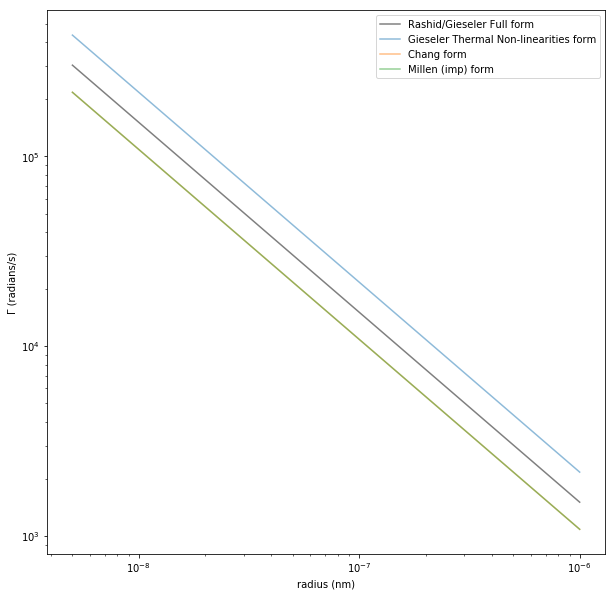

In [202]:
r = np.linspace(5e-9, 1000e-9, 1000)
P = 3.6 # mbar
alpha=0.5

plt.figure(figsize=[10, 10])
plt.loglog(r, Gamma_env_simple(r, P), 'k', label="Rashid/Gieseler Full form", alpha=alpha)
#plt.semilogy(r, Gamma_env_simple(r, P), 'grey', label="Rashid/Gieseler simplfied form", alpha=alpha)
plt.loglog(r, Gamma_alternative(r, P), label="Gieseler Thermal Non-linearities form", alpha=alpha)
plt.loglog(r, Gamma_chang(r, P), label="Chang form", alpha=alpha)
plt.loglog(r, Gamma_Millen_imp(r, P), label="Millen (imp) form", alpha=alpha)
plt.xlabel("radius (nm)")
plt.ylabel("Γ (radians/s)")
plt.legend(loc='best')
plt.show()

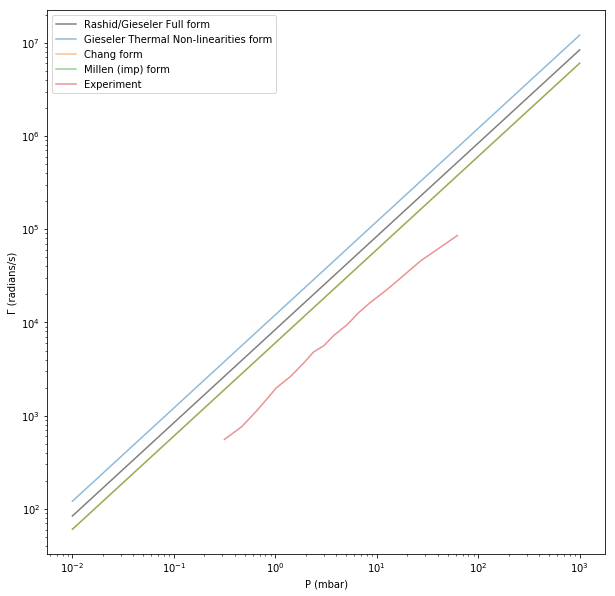

In [203]:
r = 50e-9
P = np.linspace(1e-2, 1000, 1000)

plt.figure(figsize=[10, 10])
plt.loglog(P, Gamma_env_simple(r, P), 'k', label="Rashid/Gieseler Full form", alpha=alpha)
#plt.loglog(P, Gamma_env_simple(r, P), 'grey', label="Rashid/Gieseler simplfied form", alpha=alpha)
plt.loglog(P, Gamma_alternative(r, P), label="Gieseler Thermal Non-linearities form", alpha=alpha)
plt.loglog(P, Gamma_chang(r, P), label="Chang form", alpha=alpha)
plt.loglog(P, Gamma_Millen_imp(r, P), label="Millen (imp) form", alpha=alpha)
plt.loglog(P_exp, Gamma_exp, label="Experiment", alpha=alpha)
plt.xlabel("P (mbar)")
plt.ylabel("Γ (radians/s)")
plt.legend(loc='best')
plt.show()

This doesn't match the graph in the cooling paper (*Controlling the Motion of a Nanoparticle Trapped in Vacuum - ArXiv:1603.02917*) and doesn't have any frequency dependance - we see different values for different freqs.